# **Cost of Treatment of Patient Prediction Based on Medical Cost Personal Datasets**

# **Part 1 - Mendefinisikan library**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os

 %matplotlib inline > output dari perintah ploting ditampilkan tepat di bawah sel kode.

In [2]:
%matplotlib inline

# **Part 2 - Menganbil dataset**

In [3]:
df= pd.read_csv(r'E:\Kuliah\Bisnis Cerdas\Pertemuan 4\Tugas4BisnisCerdas\insurance.csv')

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.describe() #digunakan untuk menghitung beberapa data statistik

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


Variabel target di sini adalah biaya dan enam variabel sisanya seperti usia, jenis kelamin, IMT, anak-anak, perokok, wilayah merupakan variabel bebas.

----Step3.Clean Dataset---

In [8]:
# cek/sum value null dalam tiap row
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---Step4.Explore the Data (EDA)--

a. Memvisualisasikan Variabel Target data Charges dengan menggunakan distplot

C:\Users\HANIF\anaconda3\envs\BisnisCerdas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HANIF\anaconda3\envs\BisnisCerdas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


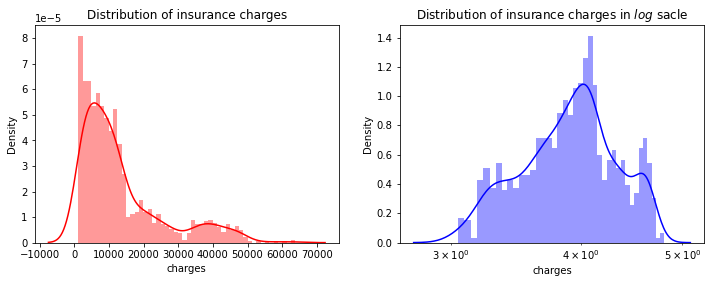

In [9]:
f= plt.figure(figsize=(12,4)) #membuat objek gambar.
ax=f.add_subplot(121) #grid
sns.distplot(df['charges'],bins=50,color='r',ax=ax) #menampilkan histogram
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122) #grid
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax) #menampilkan histogram
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


b. Memvisualisasikan data kategoris dengan menggunakan bar plot

- sex
- smoker
- region

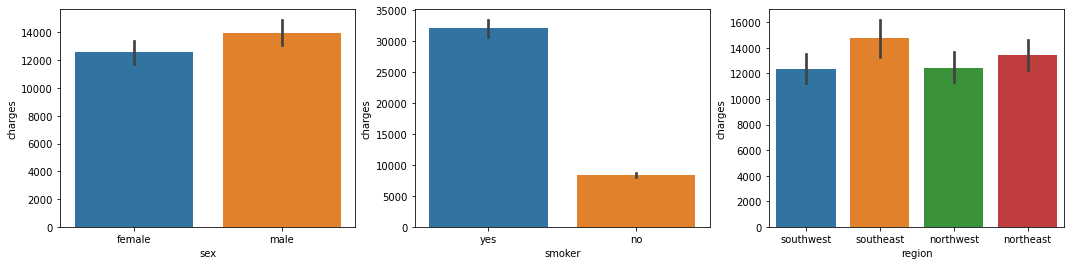

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

c.Memvisualisasikan data Numerik dengan menggunakan pairplot
- age
- bmi
- children
- charges

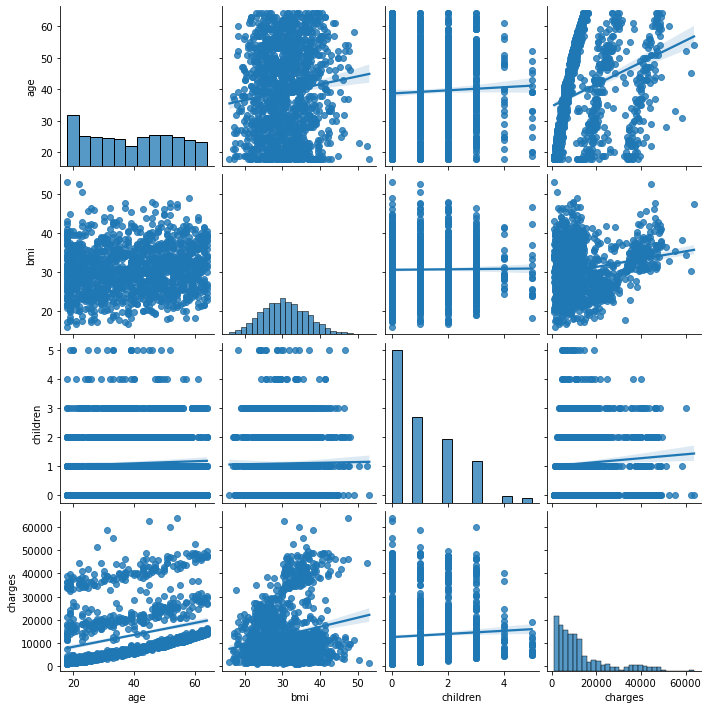

In [11]:
sns.pairplot(df,kind="reg")

<AxesSubplot:>

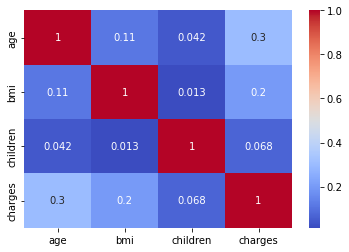

In [12]:

#Plot heatmap
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

--Step5.Label Encoding for Catogorical data---

**Label encoding** pengubahan label kata ke dalam bentuk numerik



In [13]:
# petakan variabel dengan 2 level ke 0 dan 1
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [14]:
# Ubah variabel kategori menjadi variabel dummy/indikator.
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Part 3 DEVELOP
# **Partis Train dan Test**

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # variable bebas
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [16]:
lr = LinearRegression() #LinearRegression memprediksi nilai dari y dengan mengetahui nilai x
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.7958786376014414
0.7340594348890694


**Now lets add Polynomial Feature and look at the result**

In [18]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2) #Polynomial Menghasilkan matriks fitur baru yang terdiri dari semua kombinasi polinomial fitur dengan derajat kurang dari atau sama dengan derajat yang ditentukan.
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))
print(plr.score(X_train,Y_train))

0.8849197344147236
0.827971069017031


# explained variance score

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, Y_test_pred)

0.885368444680932

# max error

In [20]:
from sklearn.metrics import max_error
max_error(Y_test, Y_test_pred)

20806.106163235032

# mean absolute error

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_test_pred)

2761.1348143598393

# mean squared error

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred)

18117605.544237167